In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 1
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 15, 2)
    #func = lambda x: tanh_decay(x, 0.2)
    producer = Producer(func)
    content_market.add_agent(producer)
    
    color = np.random.rand(3,)
    agent_colors[producer.index] = color

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 15, 2)
    #func = lambda x: tanh_decay(x, 0.2)
    consumer = Consumer(func, 1, .1, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer)

    color = np.random.rand(3,)
    agent_colors[consumer.index] = color

for i in range(num_influencers):
    influencer = Influencer(5, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

0
[(1.0,), (3.25,), (5.5,), (7.75,), (10.0,)] [(1.0,), (3.25,), (5.5,), (7.75,), (10.0,)]
[((1.0,), (1.0,)), ((3.25,), (3.25,)), ((5.5,), (5.5,)), ((7.75,), (7.75,)), ((10.0,), (10.0,)), ((1.0,), (3.25,)), ((3.25,), (1.0,)), ((3.25,), (5.5,)), ((5.5,), (3.25,)), ((5.5,), (7.75,)), ((7.75,), (5.5,)), ((7.75,), (10.0,)), ((10.0,), (7.75,)), ((1.0,), (5.5,)), ((3.25,), (7.75,)), ((5.5,), (1.0,)), ((5.5,), (10.0,)), ((7.75,), (3.25,)), ((10.0,), (5.5,)), ((1.0,), (7.75,)), ((3.25,), (10.0,)), ((7.75,), (1.0,)), ((10.0,), (3.25,)), ((1.0,), (10.0,)), ((10.0,), (1.0,))]
[(1.0,), (3.25,), (5.5,), (7.75,), (10.0,)] [(1.0,), (3.25,), (5.5,), (7.75,), (10.0,)] []


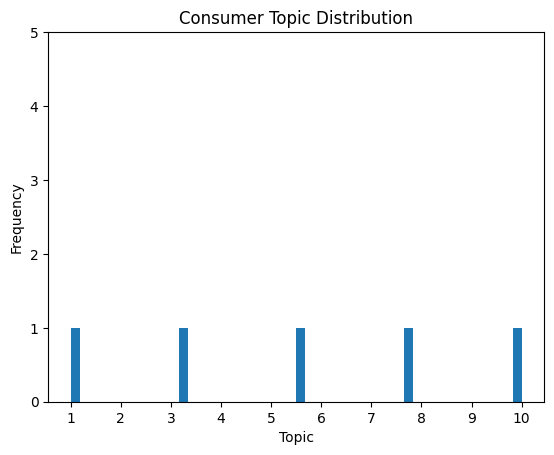

In [8]:
visualize.plot_topic_distribution_histogram("Consumer Topic Distribution", content_market.consumers, 1, 10)

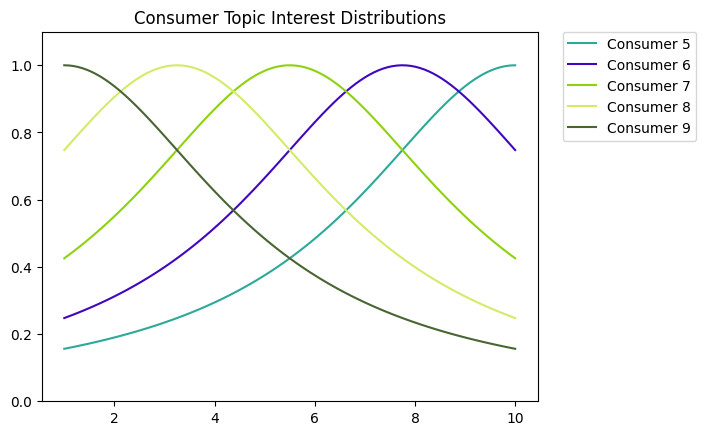

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, 1, 10, agent_colors)

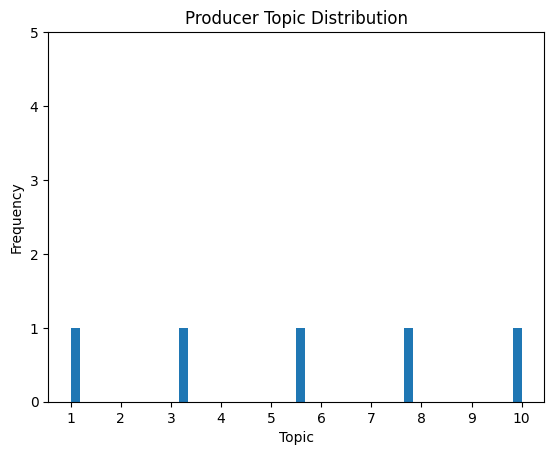

In [10]:
visualize.plot_topic_distribution_histogram("Producer Topic Distribution", content_market.producers, 1, 10)

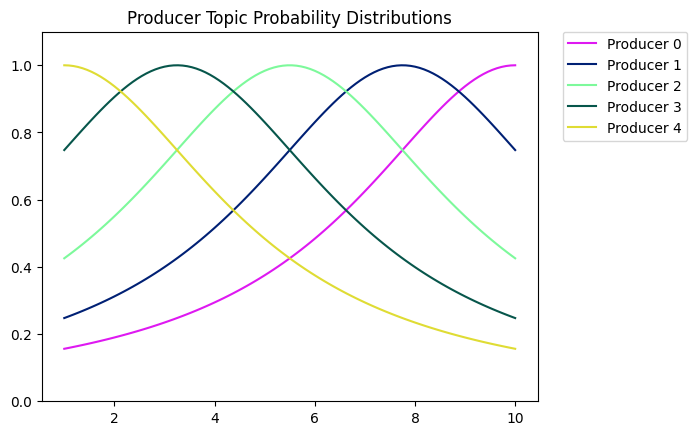

In [11]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, 1, 10, agent_colors)

In [12]:
agent_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

6
6
6
6
6
Iteration 0 / 100 done.
Total Social Welfare: 5.510705033267985
Iteration 1 / 100 done.
Total Social Welfare: 5.626799202239725
Consumer rate change: 0.0
Consumer utility change: 0.014412010750390891
Influencer rate change: 0.051699385354611195
Influencer utility change: 0.04371106435794925
Producer topic change: 0.003612032189071179
Producer utility change: 6.461017236714106e-05
Iteration 2 / 100 done.
Total Social Welfare: 5.6276045719942065
Consumer rate change: 0.0
Consumer utility change: 6.461017236703004e-05
Influencer rate change: 0.0
Influencer utility change: 0.0004823188926468269
Producer topic change: 0.0
Producer utility change: 0.0
Converged.


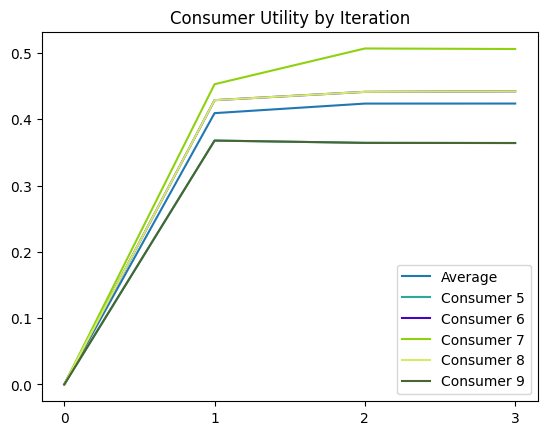

In [13]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, agent_stats, average_stats['consumer_utilities'])

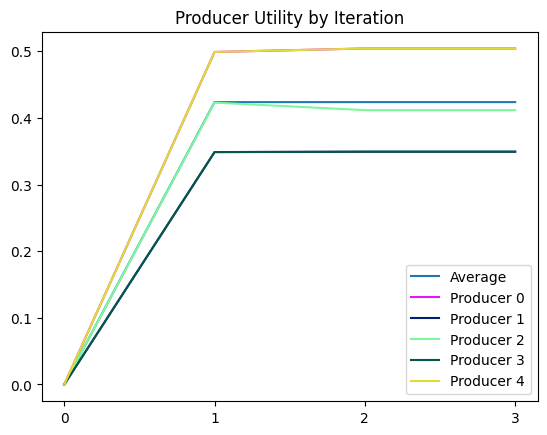

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, agent_stats, average_stats['producer_utilities'])

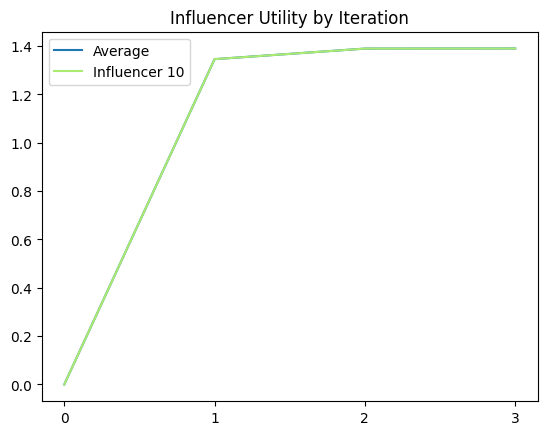

In [15]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, agent_stats, average_stats['influencer_utilities'])

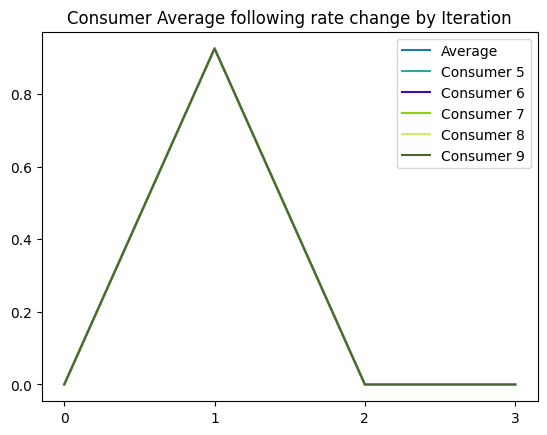

In [16]:
visualize.plot_agent_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, agent_stats, average_stats['consumer_rate_change'])

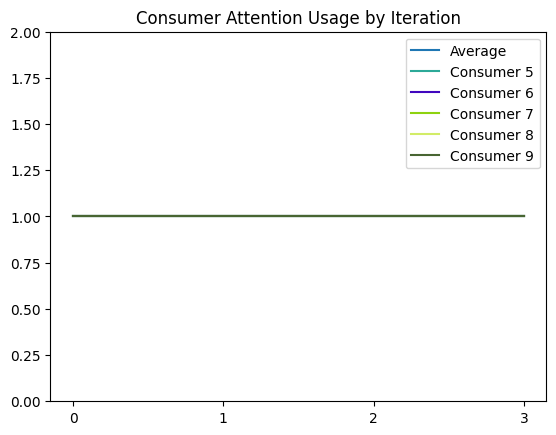

In [17]:
visualize.plot_agent_attention_used_by_iteration("Consumer Attention Usage by Iteration", content_market.consumers, agent_colors, agent_stats, average_stats['consumer_attention_used'])


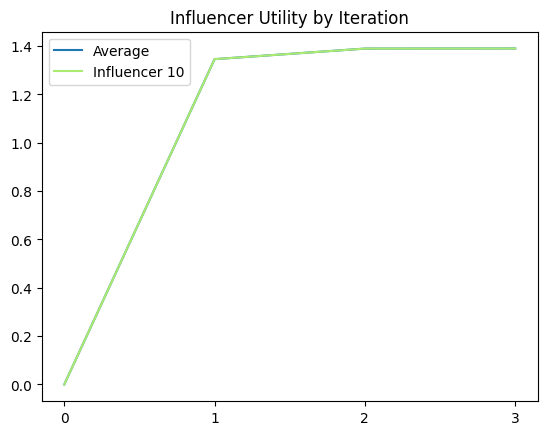

In [18]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, agent_stats, average_stats['influencer_utilities'])

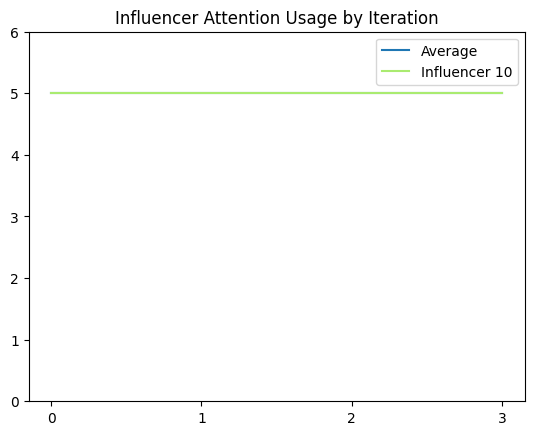

In [19]:
visualize.plot_agent_attention_used_by_iteration("Influencer Attention Usage by Iteration", content_market.influencers, agent_colors, agent_stats, average_stats['influencer_attention_used'])

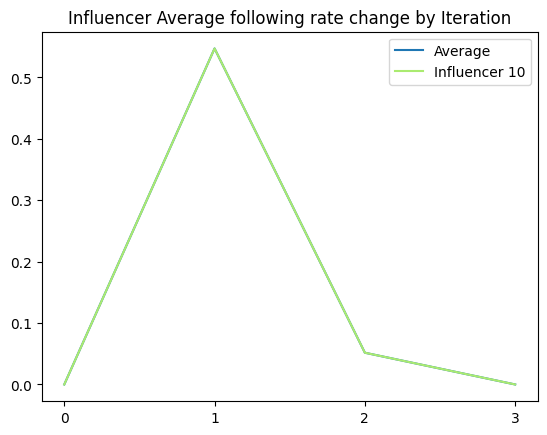

In [20]:
visualize.plot_agent_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, agent_stats, average_stats['influencer_rate_change'])

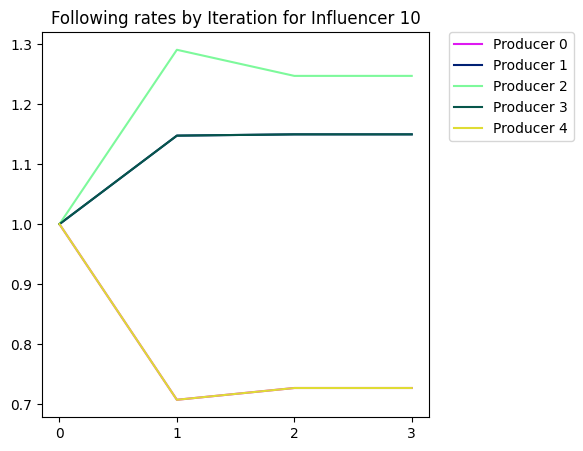

In [21]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, agent_stats)

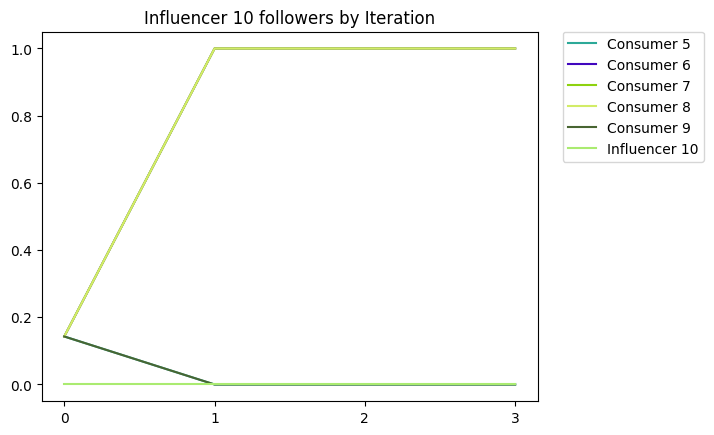

In [22]:
visualize.plot_follows_by_iteration(content_market.influencers[0], sorted(list(set(content_market.consumers + content_market.influencers)), key=lambda x: x.index), agent_colors, agent_stats)

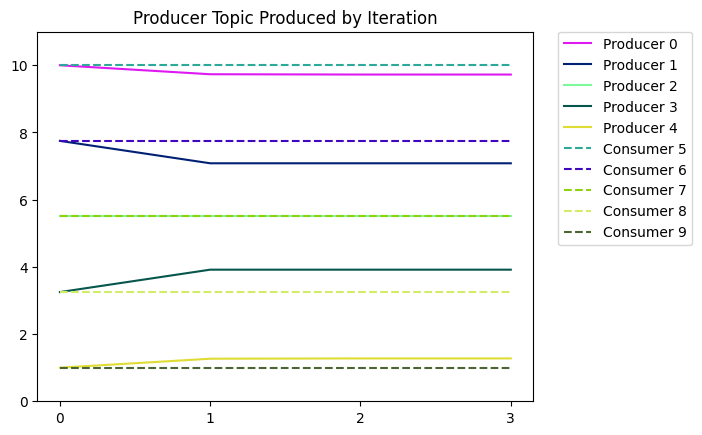

In [23]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, agent_stats)

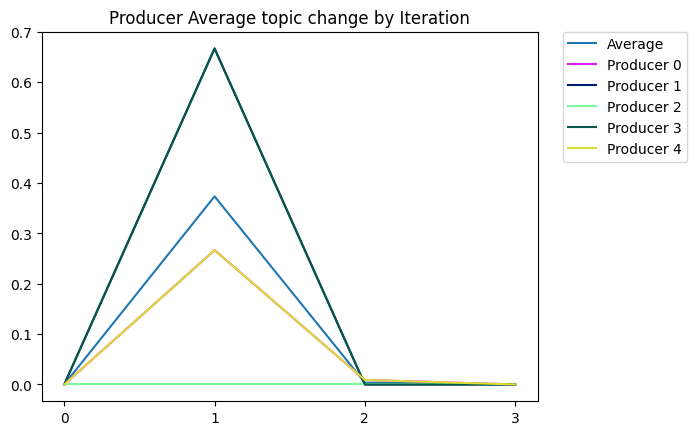

In [24]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, agent_stats, average_stats['producer_topic_change'])

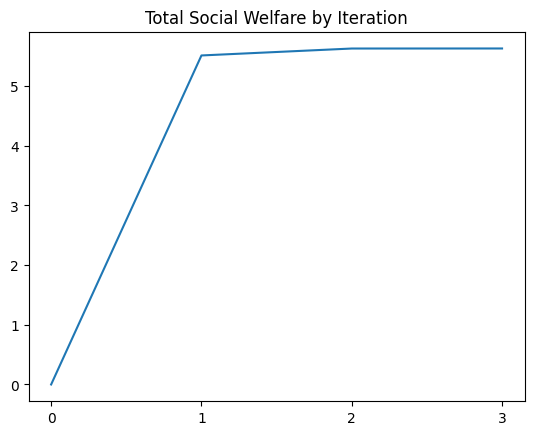

In [25]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", total_stats['social_welfare'])

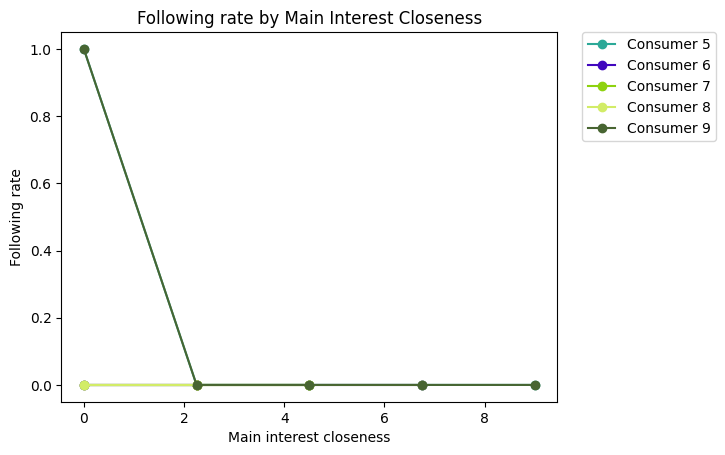

In [26]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, agent_stats)

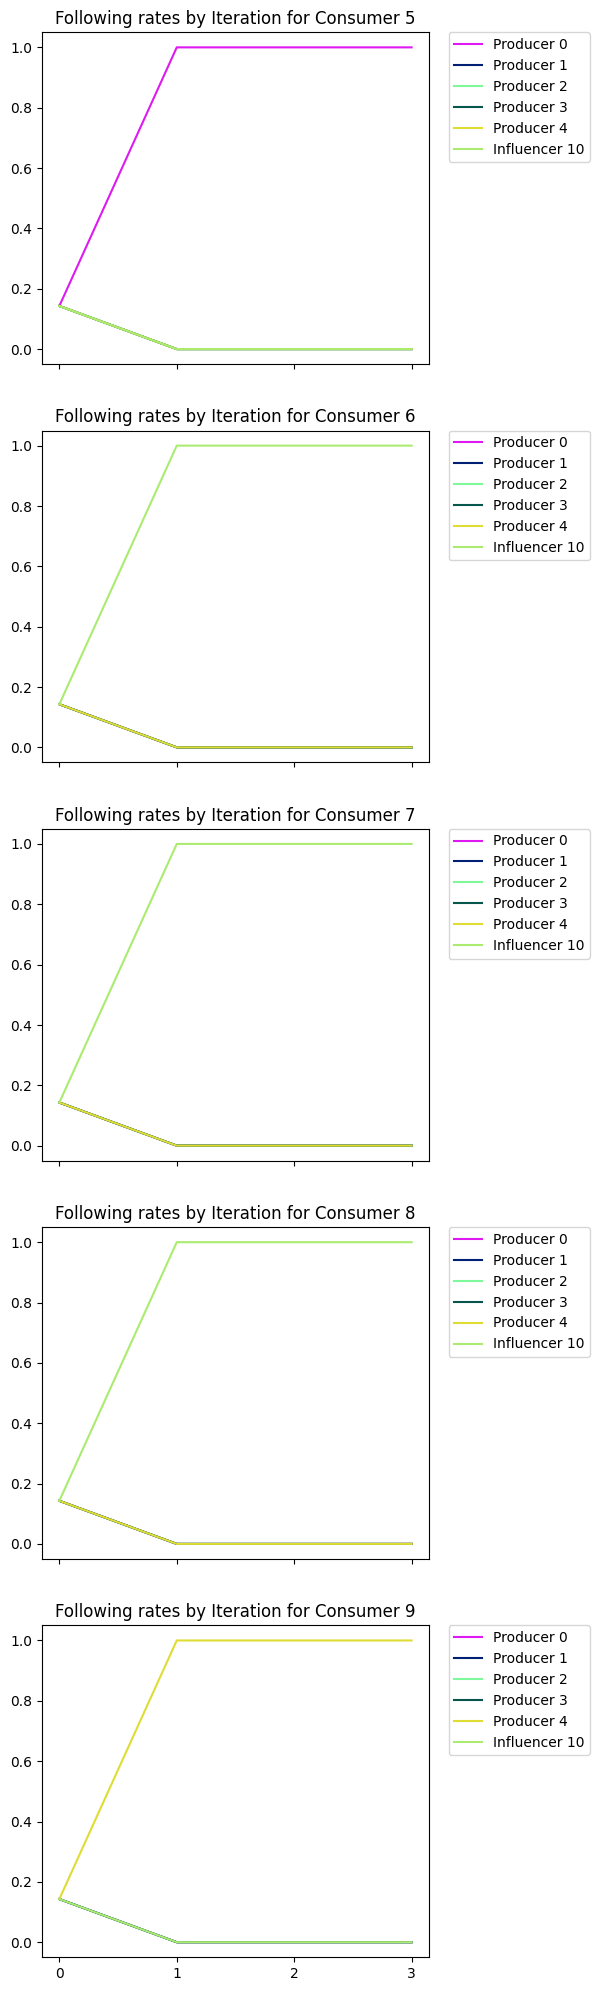

In [27]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, agent_stats)